<!-- # Can we predict the financial loss ($M) of a cyberattack using factors such as attack method, data breached, and response time?

# https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024/data -->

Can we predict the financial loss ($M) of a cyberattack using factors such as attack method, data breached, and response time?

https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024/data


In [57]:
-88.906-(1.23e-16)+0.0297+(-2.025)+513.3

422.39869999999996

In [37]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout, Dense, BatchNormalization
from tensorflow.keras.regularizers import l2

from sklearn.linear_model import Ridge


In [6]:
df = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")
df

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


In [47]:
(df["Financial Loss (in Million $)"]<20).any()

np.True_

In [7]:
df.isna().any()

Country                                False
Year                                   False
Attack Type                            False
Target Industry                        False
Financial Loss (in Million $)          False
Number of Affected Users               False
Attack Source                          False
Security Vulnerability Type            False
Defense Mechanism Used                 False
Incident Resolution Time (in Hours)    False
dtype: bool

In [8]:
(df == 0).any()

Country                                False
Year                                   False
Attack Type                            False
Target Industry                        False
Financial Loss (in Million $)          False
Number of Affected Users               False
Attack Source                          False
Security Vulnerability Type            False
Defense Mechanism Used                 False
Incident Resolution Time (in Hours)    False
dtype: bool

<Axes: >

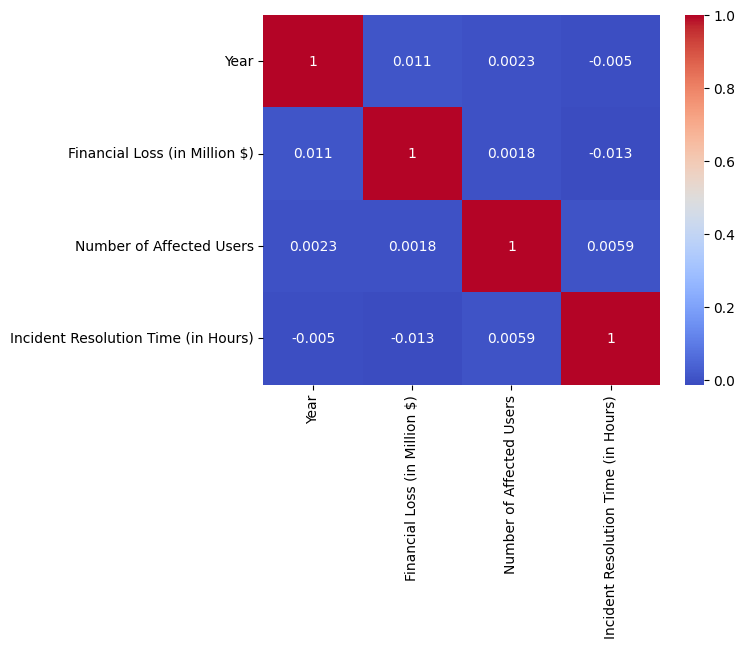

In [9]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm') 

In [10]:
df.groupby("Attack Type")['Financial Loss (in Million $)'].mean().sort_values()



Attack Type
Malware              49.418454
Ransomware           49.653793
SQL Injection        50.013042
Phishing             50.459905
Man-in-the-Middle    51.309085
DDoS                 52.035631
Name: Financial Loss (in Million $), dtype: float64

In [11]:
df.groupby("Country")['Financial Loss (in Million $)'].mean().sort_values()


Country
India        47.292597
China        48.805943
France       49.089443
Japan        49.827344
Russia       49.948237
Brazil       50.911677
UK           51.411184
USA          51.610174
Australia    51.861953
Germany      54.272302
Name: Financial Loss (in Million $), dtype: float64

In [12]:
df.groupby("Target Industry")['Financial Loss (in Million $)'].mean().sort_values()


Target Industry
Education             47.903174
Healthcare            49.047296
Retail                49.928014
Telecommunications    50.766973
Banking               51.173910
IT                    51.903410
Government            52.618685
Name: Financial Loss (in Million $), dtype: float64

In [13]:
df.groupby("Security Vulnerability Type")['Financial Loss (in Million $)'].mean().sort_values()

Security Vulnerability Type
Unpatched Software    50.168604
Zero-day              50.380306
Weak Passwords        50.519726
Social Engineering    50.905676
Name: Financial Loss (in Million $), dtype: float64

In [14]:
df.groupby("Attack Source")['Financial Loss (in Million $)'].mean().sort_values()


Attack Source
Insider         48.767965
Unknown         50.534648
Nation-state    51.004055
Hacker Group    51.745729
Name: Financial Loss (in Million $), dtype: float64

In [15]:
df.groupby("Defense Mechanism Used")['Financial Loss (in Million $)'].mean().sort_values()

Defense Mechanism Used
Firewall              49.719709
VPN                   50.209673
AI-based Detection    50.361527
Encryption            50.400203
Antivirus             51.698838
Name: Financial Loss (in Million $), dtype: float64

In [16]:
df.columns

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

In [17]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"



In [ ]:

df['id'] = range(1, len(df) + 1) 

# Reuse your raw (non-encoded) df
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)
metadata.set_primary_key('id')

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df)

synthetic_data = synthesizer.sample(num_rows=3000)
synthetic_data

/opt/anaconda3/envs/manim/lib/python3.10/site-packages/sdv/metadata/single_table.py:835: UserWarning: There is an existing primary key 'id'. This key will be removed.
  warnings.warn(
/opt/anaconda3/envs/manim/lib/python3.10/site-packages/sdv/single_table/base.py:163: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/opt/anaconda3/envs/manim/lib/python3.10/site-packages/sdv/single_table/base.py:129: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours),id
0,Australia,2023,Phishing,Education,32.98,668857,Insider,Social Engineering,Antivirus,14,5451002
1,Germany,2017,Ransomware,Retail,17.29,139507,Hacker Group,Social Engineering,Encryption,45,6046429
2,Russia,2021,Ransomware,Banking,12.57,317004,Unknown,Zero-day,VPN,19,11509909
3,Japan,2018,Man-in-the-Middle,IT,13.95,140782,Unknown,Weak Passwords,Antivirus,59,7602670
4,France,2020,Malware,Banking,69.56,862347,Nation-state,Zero-day,AI-based Detection,32,5066721
...,...,...,...,...,...,...,...,...,...,...,...
2995,India,2018,Malware,Education,45.10,85649,Unknown,Unpatched Software,Antivirus,67,14818859
2996,Australia,2015,Malware,Healthcare,81.03,12956,Hacker Group,Unpatched Software,Encryption,34,11261031
2997,France,2019,SQL Injection,Retail,25.49,562082,Hacker Group,Zero-day,Encryption,26,6098281
2998,China,2016,Phishing,Telecommunications,87.88,466108,Nation-state,Unpatched Software,Antivirus,16,15009742


In [56]:
# check if financial loss is greater than 0.5 Mil
synthetic_data = synthetic_data[synthetic_data["Financial Loss (in Million $)"]>=0.5]
synthetic_data

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,Australia,2023,Phishing,Education,32.98,668857,Insider,Social Engineering,Antivirus,14
1,Germany,2017,Ransomware,Retail,17.29,139507,Hacker Group,Social Engineering,Encryption,45
2,Russia,2021,Ransomware,Banking,12.57,317004,Unknown,Zero-day,VPN,19
3,Japan,2018,Man-in-the-Middle,IT,13.95,140782,Unknown,Weak Passwords,Antivirus,59
4,France,2020,Malware,Banking,69.56,862347,Nation-state,Zero-day,AI-based Detection,32
...,...,...,...,...,...,...,...,...,...,...
2995,India,2018,Malware,Education,45.10,85649,Unknown,Unpatched Software,Antivirus,67
2996,Australia,2015,Malware,Healthcare,81.03,12956,Hacker Group,Unpatched Software,Encryption,34
2997,France,2019,SQL Injection,Retail,25.49,562082,Hacker Group,Zero-day,Encryption,26
2998,China,2016,Phishing,Telecommunications,87.88,466108,Nation-state,Unpatched Software,Antivirus,16


In [19]:
synthetic_data.drop(columns='id', inplace=True, errors='ignore')

# Optional: remove id from original too
df.drop(columns='id', inplace=True, errors='ignore')

#  Combine datasets
df_augmented = pd.concat([df, synthetic_data], ignore_index=True)

df_augmented

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
5995,India,2018,Malware,Education,45.10,85649,Unknown,Unpatched Software,Antivirus,67
5996,Australia,2015,Malware,Healthcare,81.03,12956,Hacker Group,Unpatched Software,Encryption,34
5997,France,2019,SQL Injection,Retail,25.49,562082,Hacker Group,Zero-day,Encryption,26
5998,China,2016,Phishing,Telecommunications,87.88,466108,Nation-state,Unpatched Software,Antivirus,16


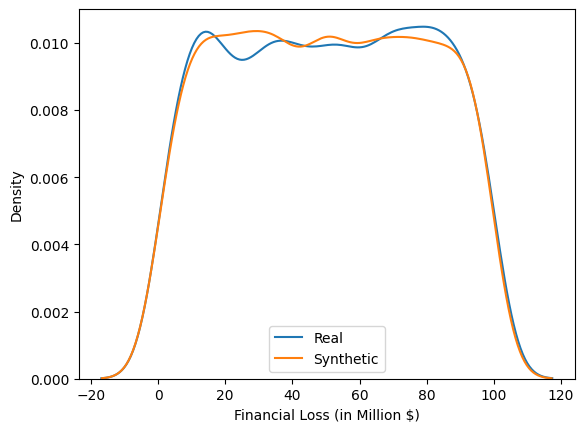

In [45]:
sns.kdeplot(df["Financial Loss (in Million $)"], label="Real")
sns.kdeplot(synthetic_data["Financial Loss (in Million $)"], label="Synthetic")
plt.legend()
plt.show()

In [21]:
categorical_cols = ['Country', 'Attack Type', 'Target Industry', 'Attack Source',
                    'Security Vulnerability Type', 'Defense Mechanism Used']

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df_augmented, columns=categorical_cols, drop_first=True)

df_encoded

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours),Country_Brazil,Country_China,Country_France,Country_Germany,Country_India,Country_Japan,...,Attack Source_Insider,Attack Source_Nation-state,Attack Source_Unknown,Security Vulnerability Type_Unpatched Software,Security Vulnerability Type_Weak Passwords,Security Vulnerability Type_Zero-day,Defense Mechanism Used_Antivirus,Defense Mechanism Used_Encryption,Defense Mechanism Used_Firewall,Defense Mechanism Used_VPN
0,2019,80.53,773169,63,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,2019,62.19,295961,71,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2017,38.65,605895,20,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
3,2024,41.44,659320,7,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2018,74.41,810682,68,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2018,45.10,85649,67,False,False,False,False,True,False,...,False,False,True,True,False,False,True,False,False,False
5996,2015,81.03,12956,34,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
5997,2019,25.49,562082,26,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
5998,2016,87.88,466108,16,False,True,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False


In [22]:
# Select features
X = df_encoded.drop(columns=['Financial Loss (in Million $)']) 
y = df_encoded['Financial Loss (in Million $)']

In [23]:


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformation
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = y_scaler.transform(y_test.values.reshape(-1, 1))

In [ ]:

# Simple feedforward neural network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

learning_rate = 0.0002
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
# model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

# Train the model
# model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)


/opt/anaconda3/envs/manim/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# less hidden layers
# switch it to leakyRelu

model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1)
])

# start with greater learning rate
learning_rate = 0.0002
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

In [26]:


early_stop = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stop, reduce_lr])




Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7936 - mae: 1.3083 - val_loss: 1.3590 - val_mae: 0.9383 - learning_rate: 2.0000e-04
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 2.2509 - mae: 1.1787 - val_loss: 1.4350 - val_mae: 0.9591 - learning_rate: 2.0000e-04
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 1.8957 - mae: 1.0806 - val_loss: 1.4074 - val_mae: 0.9564 - learning_rate: 2.0000e-04
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 1.7989 - mae: 1.0522 - val_loss: 1.3857 - val_mae: 0.9543 - learning_rate: 2.0000e-04
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 1.7614 - mae: 1.0384 - val_loss: 1.3580 - val_mae: 0.9486 - learning_rate: 2.0000e-04
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5951 - mae: 0.9962 - val_loss: 1.3412 - val_mae: 0.9422 - learning_rate: 2.0000e-04
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5032 - mae: 0.9656 - val_loss: 1.3238 - val_mae

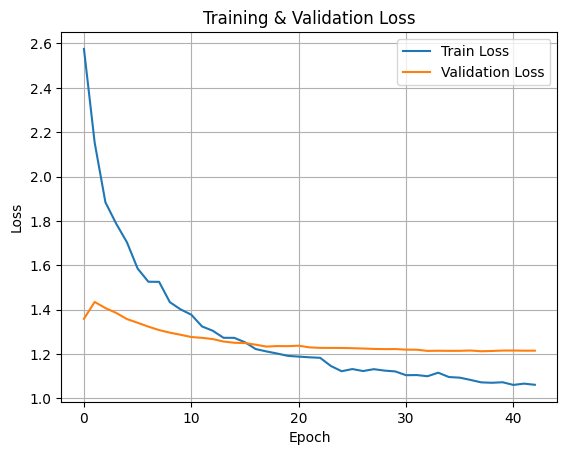

In [27]:
# Plot loss

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# model = Sequential([
#     Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     Dense(1)
# ])

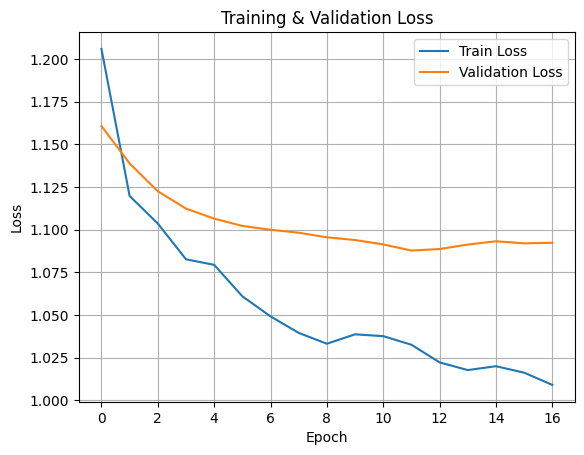

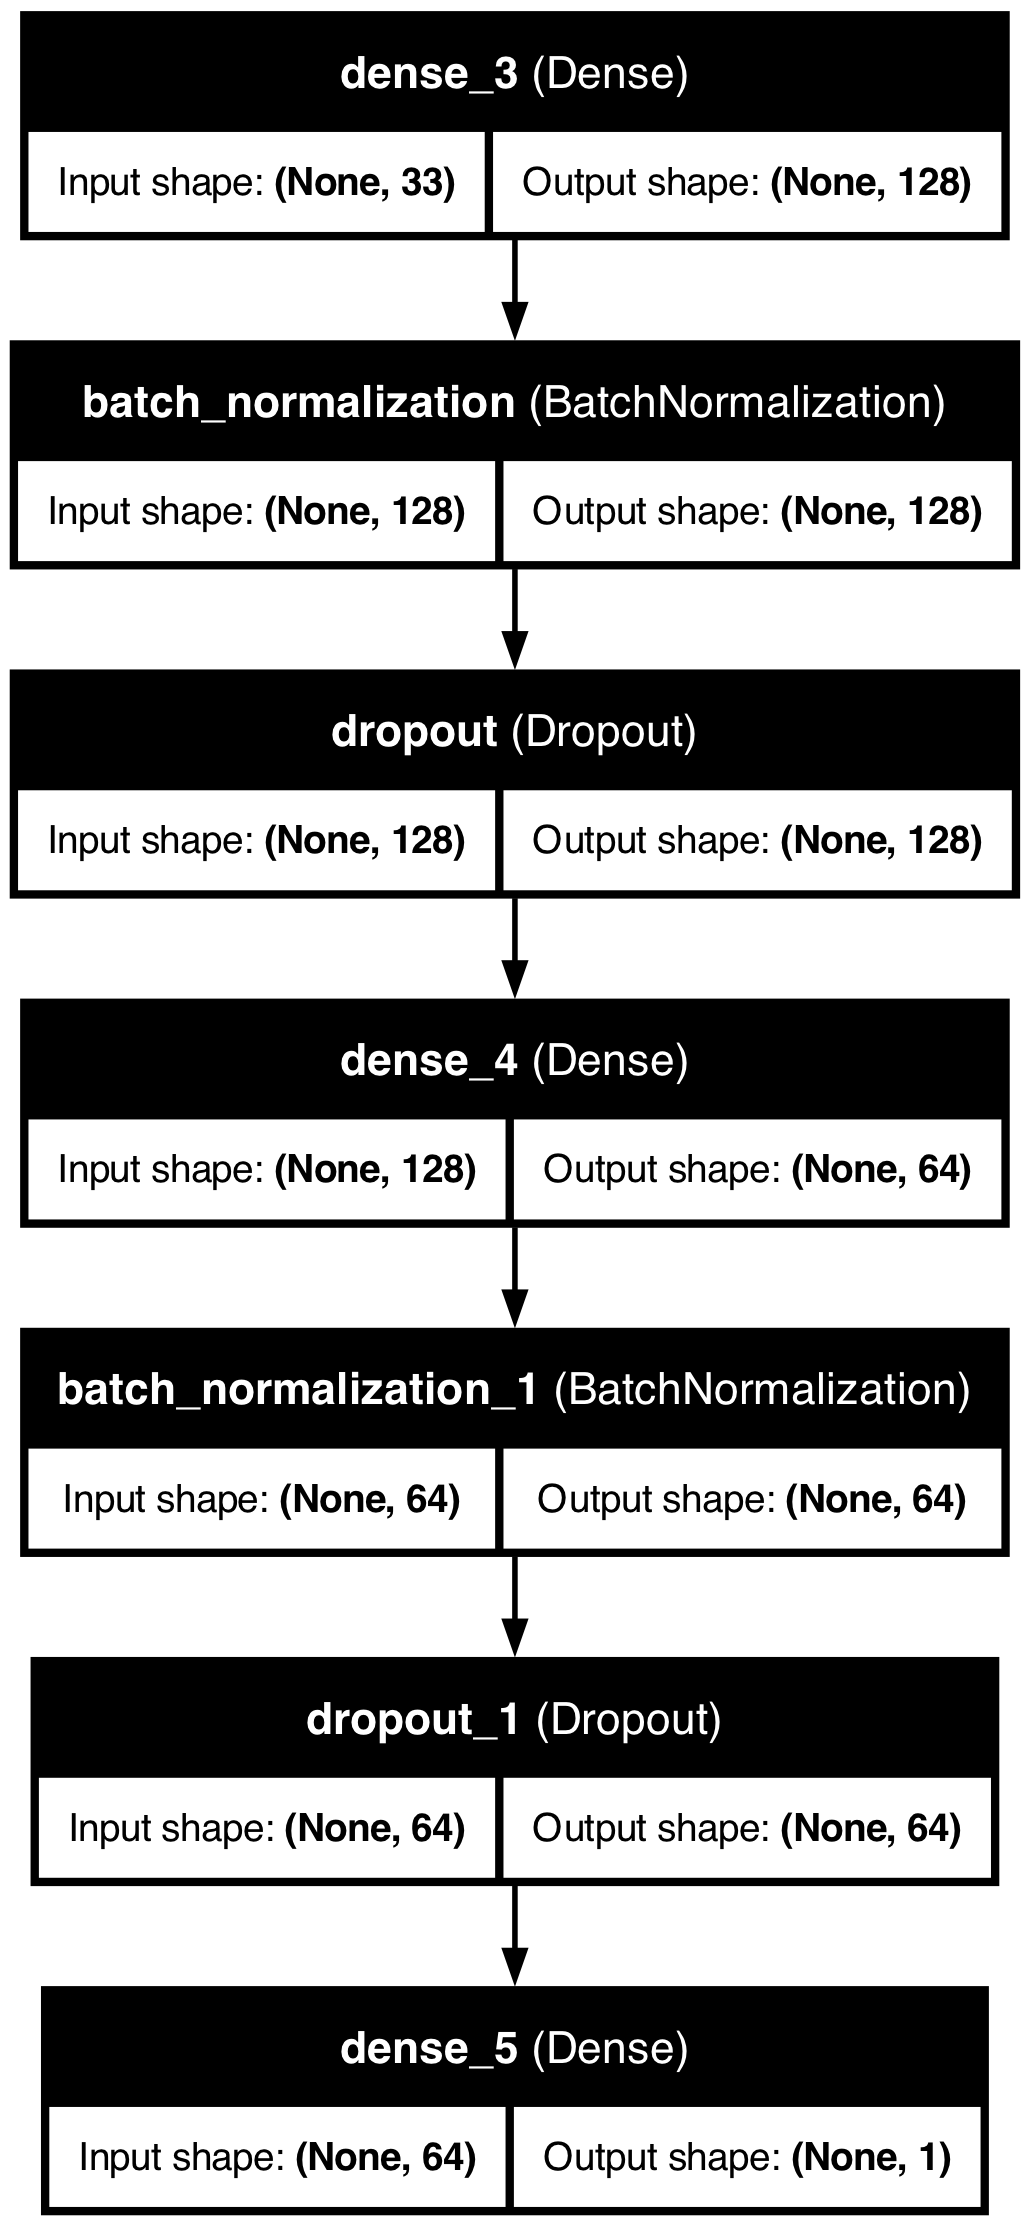

In [29]:



plot_model(model, show_shapes=True, show_layer_names=True)

In [30]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")
print(f"Test loss: {loss:.2f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 1.2407 - mae: 0.9107
Test MAE: 0.88
Test loss: 1.19


In [31]:
print(y.min(), y.max(), y.mean(), y.std())

0.5 99.99 50.29237833333334 28.675050022784013


In [32]:
y_pred_scaled = model.predict(X_test)

y_pred_orig = y_scaler.inverse_transform(y_pred_scaled)
y_test_orig = y_scaler.inverse_transform(y_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [33]:


mae_real = mean_absolute_error(y_test_orig, y_pred_orig)
mse_real = mean_squared_error(y_test_orig, y_pred_orig)
rmse_real = np.sqrt(mse_real)

print(f"Real MAE: {mae_real:.2f}")
print(f"Real RMSE: {rmse_real:.2f}")

Real MAE: 25.26
Real RMSE: 29.44


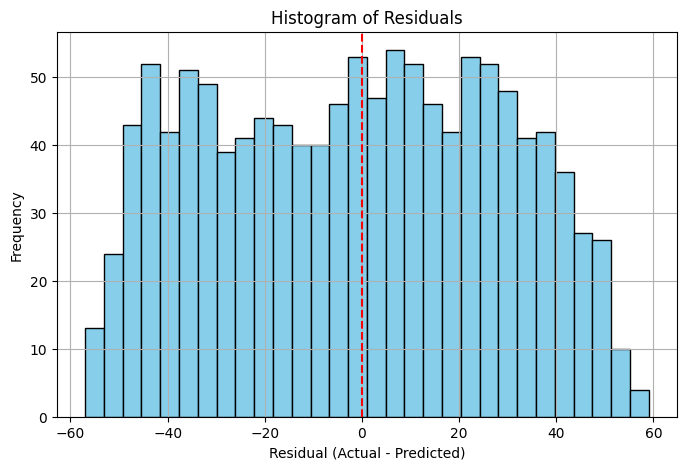

In [35]:
residuals = y_test_orig.flatten() - y_pred_orig.flatten()

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.axvline(0, color='red', linestyle='--')
plt.show()

# Ridge regression


include runtime in the write up (comparing both models)
computation cost (drawing from the runtime)


In [49]:


# Initialize and train Ridge model
ridge = Ridge(alpha=1)  # You can tune alpha (λ) for regularization strength
ridge.fit(X_train, y_train)

# Predict
y_pred = ridge.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"Ridge Regression MAE: {mae:.2f}")
print(f"Ridge Regression RMSE: {rmse:.2f}")

Ridge Regression MAE: 0.88
Ridge Regression RMSE: 1.03
